# 逻辑回归 logistic_regression

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') #样式美化
import matplotlib.pyplot as plt
# import tensorflow as tf
from sklearn.metrics import classification_report#这个包是评价报告

In [79]:
data = pd.read_csv('data/ex2data1.txt',  names=['exam1', 'exam2', 'admitted'])

In [80]:
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [81]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


e:\project\paragraph_deconstruction\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
e:\project\paragraph_deconstruction\venv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


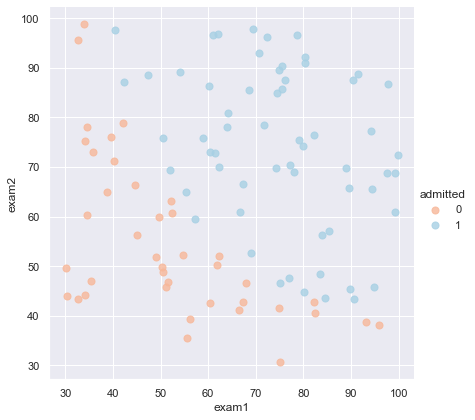

In [82]:
sns.set(context="notebook", style="darkgrid", palette=sns.color_palette("RdBu", 2))

sns.lmplot('exam1', 'exam2', hue='admitted', data=data, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )
plt.show()#看下数据的样子

In [83]:
def get_X(df):
    ones = df.insert(0, 'ones', 1)
    return np.array(df.iloc[:, :-1])

def get_y(df):
    return np.array(df.iloc[:, -1])

def normalize_feature(df):
    return df.apply(lambda x: (x - x.mean()) / x.std())

In [84]:
X = get_X(data)

In [85]:
y = get_y(data)

# sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 


In [86]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

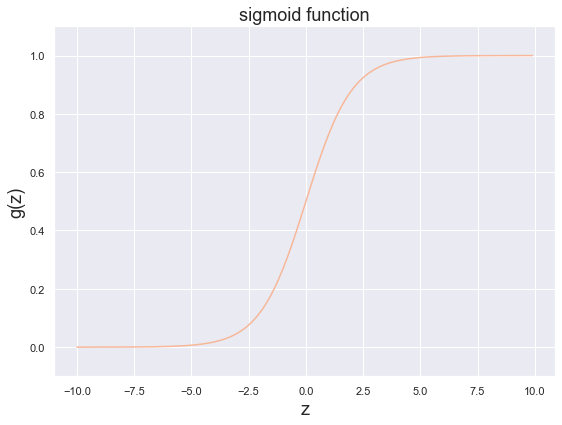

In [87]:
fig, ax = plt.subplots(figsize=(8 ,6))
ax.plot(np.arange(-10, 10, 0.1),
       sigmoid(np.arange(-10, 10, 0.1)))
ax.set_ylim((-0.1, 1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

# cost function(代价函数)
> * $max(\ell(\theta)) = min(-\ell(\theta))$  
> * choose $-\ell(\theta)$ as the cost function

$$\begin{align}
  & J\left( \theta  \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
 & =\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
\end{align}$$


In [88]:
theta = np.zeros(X.shape[1])

In [89]:
theta

array([0., 0., 0.])

In [90]:
def cost(theta, X, y):
    return np.mean(-(y * np.log(sigmoid(X @ theta)) + (1 - y) * np.log(1 - sigmoid(X @ theta))))

In [93]:
X.shape, y.shape, theta.shape

((100, 3), (100,), (3,))

In [94]:
cost(theta, X ,y)

0.6931471805599453


# gradient descent(梯度下降)
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [95]:
def gradient(theta, X, y):
    return ((sigmoid(X @ theta) - y) @ X) / len(X)

In [96]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

### 拟合参数

In [97]:
import scipy.optimize as opt

In [98]:
res = opt.minimize(fun=cost, x0=theta, args=(X,y), method='Newton-CG', jac=gradient)

In [99]:
res

     fun: 0.2035504433103571
     jac: array([ 0.00013716, -0.003024  , -0.00240092])
 message: 'Optimization terminated successfully.'
    nfev: 63
    nhev: 0
     nit: 25
    njev: 158
  status: 0
 success: True
       x: array([-24.57181327,   0.20151852,   0.19669926])

### 采用训练集预测和验证

In [100]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [101]:
theta = res.x
y_pred = predict(X, theta)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



### 决策边界

In [102]:
conf = -(res.x / res.x[2])
print(conf)

x = np.arange(0, 130, 0.1)
y = conf[0] + conf[1]*x

[124.92072188  -1.02450068  -1.        ]


In [103]:
data.describe()  # find the range of x and y

,ones,exam1,exam2,admitted
count,100.0,100.000000,100.000000,100.000000
mean,1.0,65.644274,66.221998,0.600000
std,0.0,19.458222,18.582783,0.492366
min,1.0,30.058822,30.603263,0.000000
25%,1.0,50.919511,48.179205,0.000000
50%,1.0,67.032988,67.682381,1.000000
75%,1.0,80.212529,79.360605,1.000000
max,1.0,99.827858,98.869436,1.000000


e:\project\paragraph_deconstruction\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


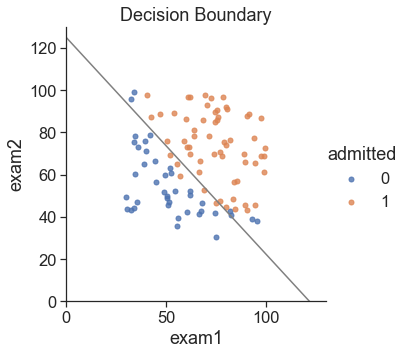

In [104]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('exam1', 'exam2', hue='admitted', 
           data=data, fit_reg=False,  scatter_kws={"s": 25})

plt.plot(x, y, 'grey')
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.title('Decision Boundary')
plt.show()

# 3- 正则化逻辑回归

In [105]:
df = pd.read_csv('data/ex2data2.txt', names=['test1', 'test2', 'accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


e:\project\paragraph_deconstruction\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


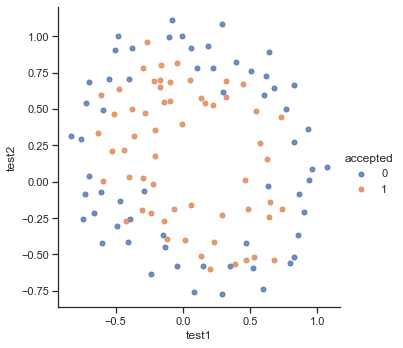

In [106]:
sns.set(context='notebook', style='ticks')

sns.lmplot("test1", "test2", hue='accepted', data=df,
          fit_reg=False, scatter_kws={"s": 25})

## 特征映射 
将线性特征映射为高维特征展开式，为了拟合更加复杂的数据

In [179]:
def feature_mapping(x, y, power, as_ndarray=False):
    data = {
        "f{}{}".format(i-p, p): np.power(x, i - p) * np.power(y, p)
        for i in np.arange(power+1)
        for p in np.arange(i+1)
    }
    if as_ndarray:
        return np.array(pd.DataFrame(data))
    else:
        return pd.DataFrame(data)

In [180]:
x1, x2 = np.array(df['test1']), np.array(df['test2']) 

In [181]:
data = feature_mapping(x1, x2, 6)
print(data.shape)
data.head()

(118, 28)


,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


# regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [182]:
theta = np.zeros(data.shape[1])
X = feature_mapping(x1, x2, 6, True)
y = get_y(df)
print(X.shape, y.shape, theta.shape)

(118, 28) (118,) (28,)


In [183]:
def regularized_cost(theta, X, y, l=1):
    theta_j1_to_n = theta[1:]
    regularized_term = (l / (2*len(X)) ) * np.power(theta_j1_to_n, 2).sum()
    return  cost(theta, X, y) + regularized_term

In [184]:
loss = regularized_cost(theta, X, y)

In [185]:
loss

0.6931471805599454

# regularized gradient(正则化梯度)
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\left( \frac{1}{m}\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}\left( {{x}^{\left( i \right)}} \right)-{{y}^{\left( i \right)}} \right)} \right)+\frac{\lambda }{m}{{\theta }_{j}}\text{ }\text{             for  j}\ge \text{1}$$

In [261]:
def regularized_gradient(theta, X, y, l=1):
    
    theta_j1_to_n = theta[1:]
    regularized_theta = (l / len(X)) * theta_j1_to_n
    
    regularized_term = np.concatenate([np.array([0]), regularized_theta])

    return gradient(theta, X, y) + regularized_term

In [262]:
regularized_gradient(theta, X, y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

### 拟合参数

In [263]:
import scipy.optimize as opt

In [264]:
res = opt.minimize(fun=regularized_cost, x0=theta, args=(X, y), method='Newton-CG', jac=regularized_gradient)
res

     fun: 0.52900272971272
     jac: array([-2.85991285e-07, -3.53503710e-09, -3.26251198e-10, -4.66856161e-08,
        1.17292225e-08, -4.44501845e-08, -1.25231000e-08, -3.18915305e-09,
       -7.15218903e-09,  4.08210263e-09, -3.25778263e-08,  8.73378474e-09,
       -6.54262663e-10, -1.57161073e-09,  7.04306819e-09, -7.98022337e-09,
       -2.02095125e-09, -3.46331565e-10, -4.38723033e-10, -5.19854778e-09,
        2.32349092e-08, -9.92221033e-09,  2.37243401e-09, -2.46815299e-10,
        1.34623721e-09,  4.59806990e-09, -1.22728297e-09,  3.09113513e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 61
  status: 0
 success: True
       x: array([ 1.27273907,  0.6252718 ,  1.18108782, -2.0199591 , -0.91742341,
       -1.43166465,  0.12400594, -0.36553454, -0.35723969, -0.17513131,
       -1.458157  , -0.05098854, -0.6155543 , -0.27470648, -1.19281591,
       -0.24218834, -0.20600621, -0.04473061, -0.27778459, -0.29537816,
       -0.456

In [265]:
final_theta = res.x
y_pred = predict(X, final_theta)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



# 使用不同的 $\lambda$ （这个是常数）
# 画出决策边界
* 我们找到所有满足 $X\times \theta = 0$ 的x
* instead of solving polynomial equation, just create a coridate x,y grid that is dense enough, and find all those $X\times \theta$ that is close enough to 0, then plot them

In [278]:
def draw_boundary(power, l):
    density = 1000
    threshhold = 2 * 10**-3
    
    final_theta = feature_mapped_logistic_retression(power, l)
    
    x, y = find_decision_boundary(density, power, final_theta, threshhold)

    df = pd.read_csv('data/ex2data2.txt', names=['test1', 'test2', 'accepted'])
    sns.lmplot('test1', 'test2', hue='accepted', data=df, size=6, fit_reg=False, scatter_kws={"s": 100})

    plt.scatter(x, y, c='r', s=10)
    plt.title('Decision boundary')
    plt.show()

In [279]:
def feature_mapped_logistic_retression(power, l):
    df = pd.read_csv('data/ex2data2.txt', names=['test1', 'test2', 'accepted'])
    x1, x2, y = df.test1, df.test2, get_y(df)
    
    X = feature_mapping(x1, x2, power, as_ndarray=True)
    theta = np.zeros(X.shape[1])
    
    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient)
    final_theta = res.x

    return final_theta

In [280]:
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)
    
    cordinaters = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinaters)
    mapped_cord = feature_mapping(x_cord, y_cord, power)  # this is a dataframe

    inner_product = np.array(mapped_cord) @ theta
    
    decision = mapped_cord[np.abs(inner_product) < threshhold]
    
    return decision.f10, decision.f01

e:\project\paragraph_deconstruction\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
e:\project\paragraph_deconstruction\venv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


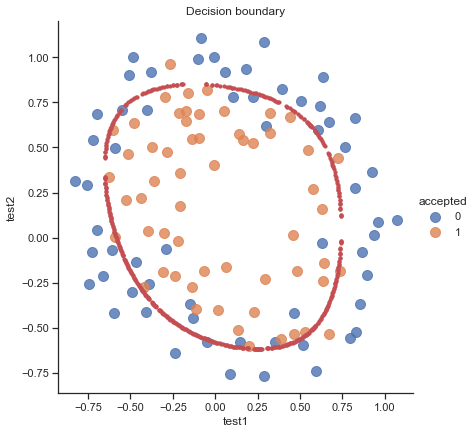

In [281]:
draw_boundary(power=6, l=1)     #set lambda = 1

e:\project\paragraph_deconstruction\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
e:\project\paragraph_deconstruction\venv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


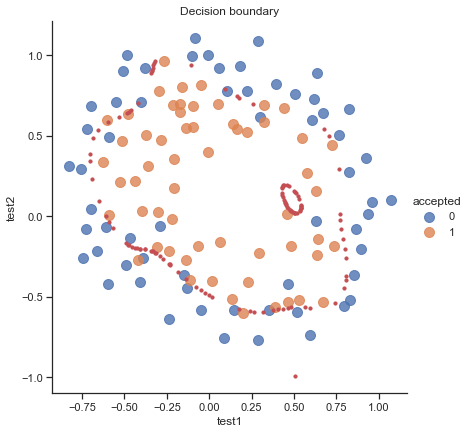

In [282]:
draw_boundary(power=6, l=0)     #set lambda = 1

e:\project\paragraph_deconstruction\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
e:\project\paragraph_deconstruction\venv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


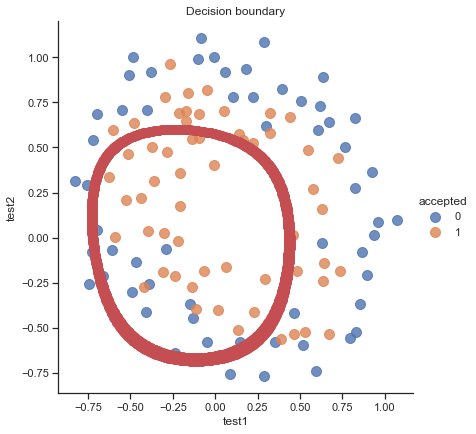

In [285]:
draw_boundary(power=6, l=100)     #set lambda = 1

e:\project\paragraph_deconstruction\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
e:\project\paragraph_deconstruction\venv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


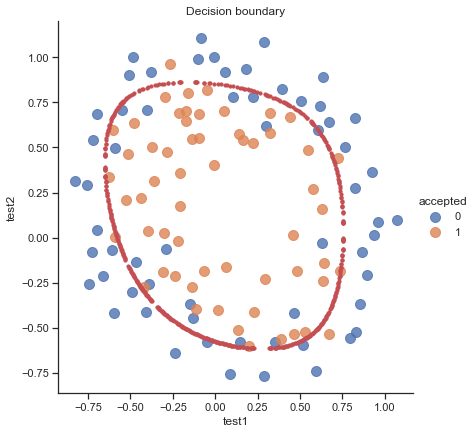

In [289]:
draw_boundary(power=15, l=1)     #set lambda = 1